<a href="https://colab.research.google.com/github/abishek-raju/EVA4B2/blob/branch1/EVA_5_B2_Session_3X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Prep

In [1]:
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

In [2]:
train_set = torchvision.datasets.EMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,split = "byclass"
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

test_set = torchvision.datasets.EMNIST(
    root='./data'
    ,train=False
    ,download=True
    ,split = "byclass"
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

Using downloaded and verified file: ./data/EMNIST/raw/emnist.zip
Extracting ./data/EMNIST/raw/emnist.zip to ./data/EMNIST/raw
Processing byclass


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Processing bymerge
Processing balanced
Processing letters
Processing digits
Processing mnist
Done!


Basic EDA

In [3]:
# len(train_set.data)
len(train_set.targets)

697932

In [4]:
import numpy as np
import matplotlib.pyplot as plt

label: 35


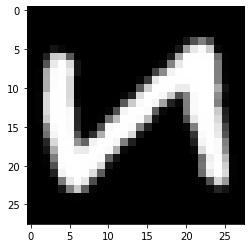

In [5]:
sample = next(iter(train_set))
image , label = sample
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)


Batch Loader

In [6]:
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=10
    ,shuffle=True
)

test_loader = torch.utils.data.DataLoader(test_set
    ,batch_size=10
    ,shuffle=True
)

In [7]:
sample = next(iter(train_loader))
images, labels = sample

labels: tensor([54, 15, 28,  2,  8,  4, 24,  4,  8, 20])


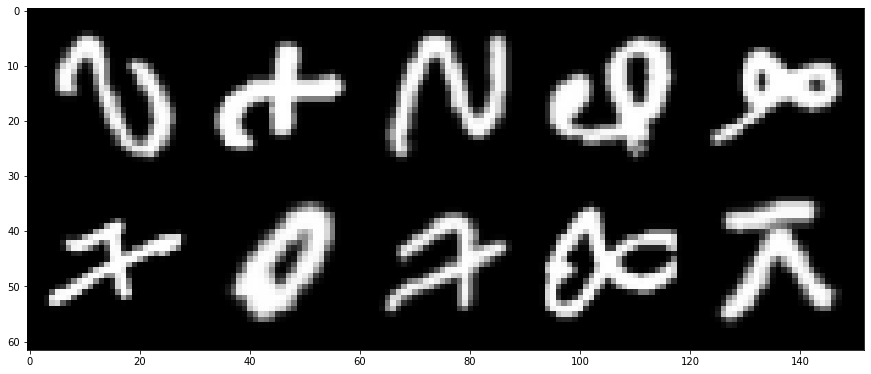

In [8]:
grid = torchvision.utils.make_grid(images, nrow=5)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

Building a network<br>
torch.nn.Conv2d(in_channels: int, out_channels: int, kernel_size: Union[T, Tuple[T, T]], stride: Union[T, Tuple[T, T]] = 1, padding: Union[T, Tuple[T, T]] = 0, dilation: Union[T, Tuple[T, T]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros')<br>
<br>
<br>
6 Convolution layers with these kernels (10, 10, 20, 20, 30)<br>
no fully connected layer (you probably may have to use the Global Average Pooling layer)<br>
uses EMNIST as the dataset<br>
uses a maximum of 2 max-pooling layers

In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class ELIMENTARY(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv2d_1 = nn.Conv2d(in_channels = 1,
                              out_channels = 10,
                              kernel_size = 3)
    self.conv2d_2 = nn.Conv2d(in_channels = 10,
                              out_channels = 10,
                              kernel_size = 3)
    self.conv2d_3 = nn.Conv2d(in_channels = 10,
                              out_channels = 20,
                              kernel_size = 3)
    self.conv2d_4 = nn.Conv2d(in_channels = 20,
                              out_channels = 20,
                              kernel_size = 3)
    self.conv2d_5 = nn.Conv2d(in_channels = 20,
                              out_channels = 30,
                              kernel_size = 3)
    self.conv2d_6 = nn.Conv2d(in_channels = 30,
                              out_channels = 62,#classes
                              kernel_size = 3)
    
  def forward(self,t):
    # where t is the input layer------------------------------Input Layer------1 x 28 x28
    t = t

    # hidden conv layer---------------------------------------1st Hidden Layer-INPUT- 1 x 28 x 28
    t = self.conv2d_1(t)                                                     #OUTPUT-10 x 26 x 26
    t = F.relu(t)                                                            #    RF-3

    # hidden conv layer---------------------------------------2nd Hidden Layer-INPUT-10 x 26 x 26
    t = self.conv2d_2(t)                                                     #OUTPUT-10 x 24 x 24
    t = F.relu(t)                                                            #    RF-5

    # hidden conv layer---------------------------------------3rd Hidden Layer-INPUT-10 x 24 x 24
    t = self.conv2d_3(t)                                                     #OUTPUT-20 x 22 x 22
    t = F.relu(t)                                                            #    RF-7


    # hidden conv layer---------------------------------------4th Hidden Layer-INPUT-20 x 22 x 22
    t = self.conv2d_4(t)                                                     #OUTPUT-20 x 20 x 20
    t = F.relu(t)                                                            #    RF-9

    # Max pooling
    t = F.max_pool2d(t, kernel_size=2, stride=2)                             #    RF-10

    # hidden conv layer---------------------------------------5th Hidden Layer-INPUT-20 x 10 x 10
    t = self.conv2d_5(t)                                                     #OUTPUT-30 x 8 x 8
    t = F.relu(t)                                                            #    RF-14

    # hidden conv layer---------------------------------------6th Hidden Layer-INPUT-10 x 22 x 22
    t = self.conv2d_6(t)                                                     #OUTPUT-10 x 20x 20
    t = F.relu(t)                                                            #    RF-16


    t = F.adaptive_avg_pool2d(t, (1, 1))#--------------------------------------------1,62,1,1
    t = F.softmax(t, dim=1)

    return t.squeeze()

In [11]:
torch.set_grad_enabled(True)

In [12]:
network = ELIMENTARY()
pred = network(image.unsqueeze(0)) # image shape needs to be (batch_size × in_channels × H × W)

In [13]:
pred

tensor([0.0159, 0.0159, 0.0159, 0.0162, 0.0166, 0.0159, 0.0159, 0.0164, 0.0159,
        0.0166, 0.0159, 0.0159, 0.0164, 0.0162, 0.0159, 0.0162, 0.0159, 0.0169,
        0.0159, 0.0166, 0.0159, 0.0159, 0.0161, 0.0159, 0.0168, 0.0159, 0.0159,
        0.0159, 0.0159, 0.0159, 0.0159, 0.0159, 0.0167, 0.0159, 0.0160, 0.0160,
        0.0159, 0.0175, 0.0176, 0.0159, 0.0170, 0.0169, 0.0160, 0.0159, 0.0159,
        0.0159, 0.0159, 0.0159, 0.0159, 0.0159, 0.0159, 0.0170, 0.0159, 0.0159,
        0.0159, 0.0159, 0.0159, 0.0160, 0.0165, 0.0159, 0.0159, 0.0159],
       grad_fn=<SqueezeBackward0>)

In [14]:
import torch.optim as optim

In [15]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [22]:
network = ELIMENTARY()
network.to(device)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.001)

loss_logs = []
total_correct_logs = []
accuracy_logs = []

for epoch in range(21):
  total_loss = 0
  total_correct = 0
  for batch in train_loader: # Get Batch
      images, labels = batch 
      images, labels = images.to(device), labels.to(device)

      preds = network(images) # Pass Batch
      loss = F.cross_entropy(preds, labels) # Calculate Loss

      optimizer.zero_grad()
      loss.backward() # Calculate Gradients
      optimizer.step() # Update Weights

      total_loss += loss.item()
      total_correct += get_num_correct(preds, labels)

  print(
      "epoch:", epoch, 
      "total_correct:", total_correct, 
      "loss:", total_loss,
      "Accuracy:",total_correct/len(train_set)
  )
  loss_logs.append(total_loss)
  total_correct_logs.append(total_correct)
  accuracy_logs.append(total_correct/len(train_set))

epoch: 0 total_correct: 201916 loss: 26978.699825048447 Accuracy: 0.2893061215132706
epoch: 1 total_correct: 237106 loss: 26624.25921034813 Accuracy: 0.3397265063072047
epoch: 2 total_correct: 243596 loss: 26558.275543928146 Accuracy: 0.3490254064865918
epoch: 3 total_correct: 260703 loss: 26387.27057337761 Accuracy: 0.37353639036467734
epoch: 4 total_correct: 298141 loss: 26014.740111351013 Accuracy: 0.4271777193193606
epoch: 5 total_correct: 298682 loss: 26009.22577548027 Accuracy: 0.42795286646836656
epoch: 6 total_correct: 299049 loss: 26005.865644216537 Accuracy: 0.42847870566186963
epoch: 7 total_correct: 299181 loss: 26004.471890687943 Accuracy: 0.4286678358350097
epoch: 8 total_correct: 299349 loss: 26002.779321432114 Accuracy: 0.42890854696446074
epoch: 9 total_correct: 299602 loss: 26000.691295146942 Accuracy: 0.4292710464629792
epoch: 10 total_correct: 299451 loss: 26001.85801243782 Accuracy: 0.42905469300734167
epoch: 11 total_correct: 299592 loss: 26000.840885162354 Accura